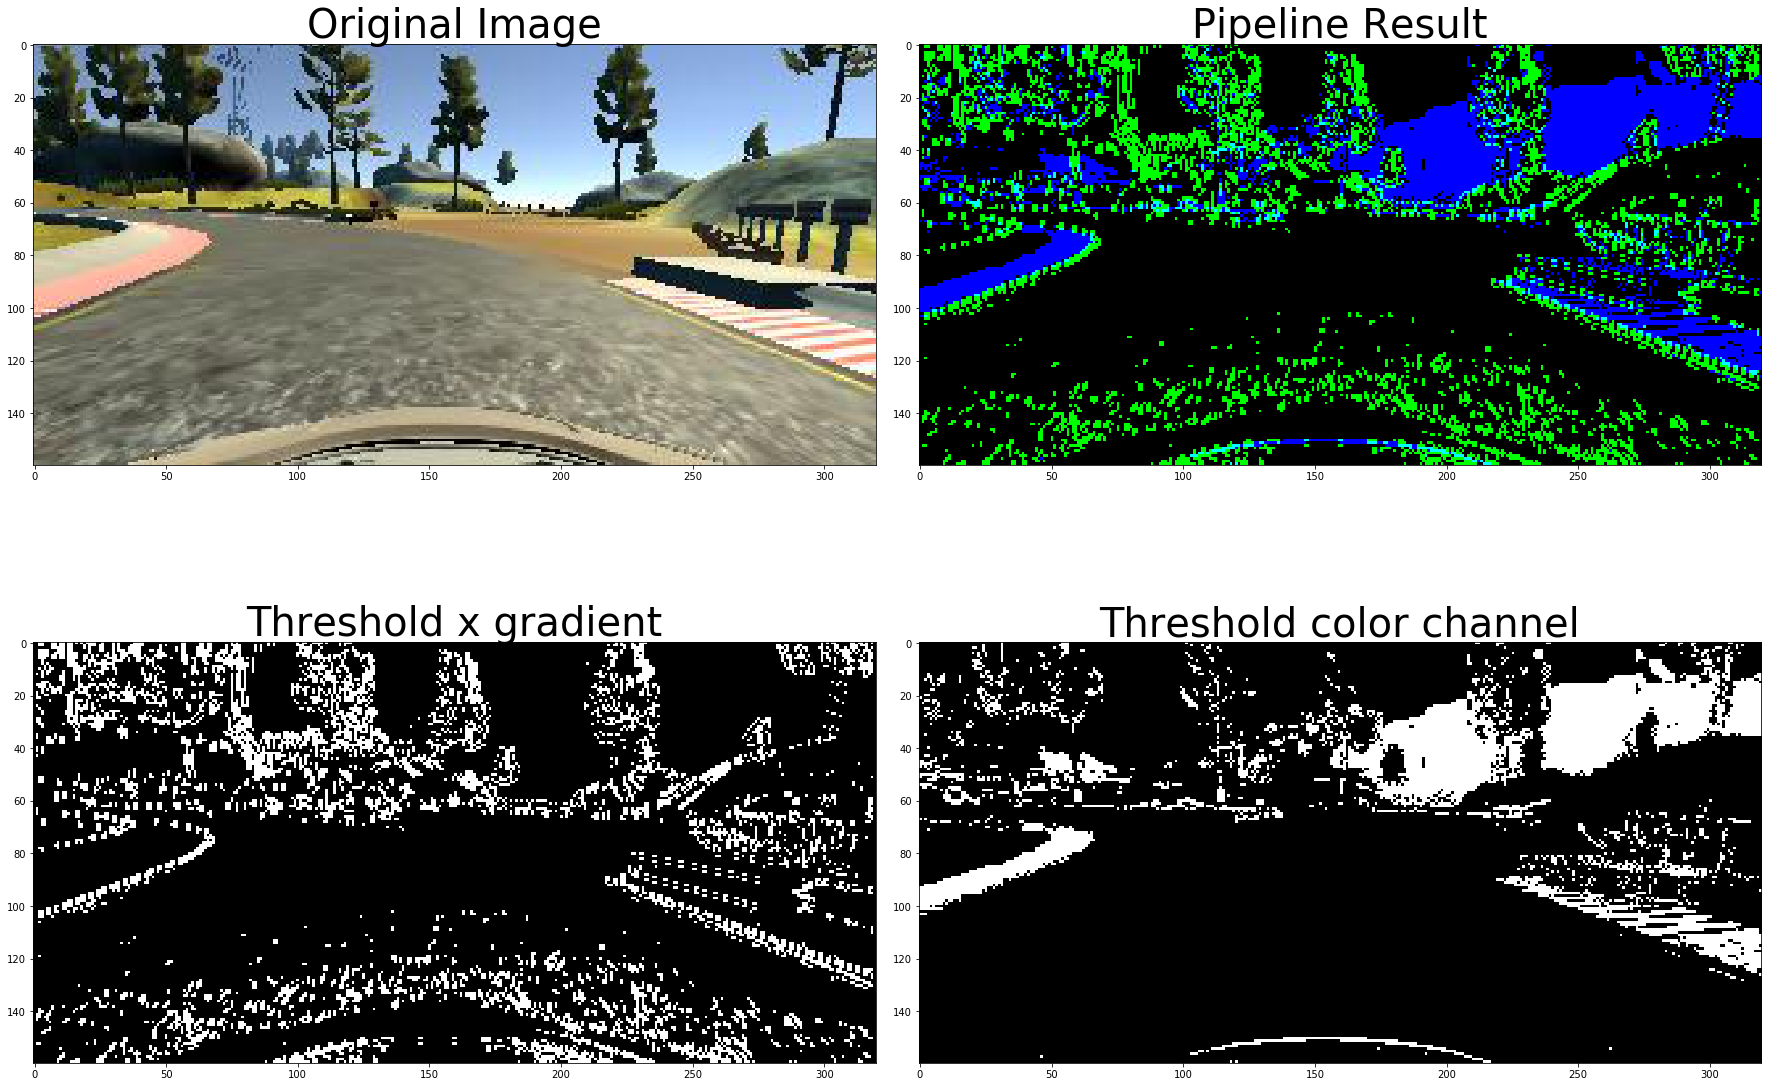

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# NOTE jpg and png format pixel values are different ranges? jpg = 8bit? png=0 to 1.0?
# image = mpimg.imread('./signs_vehicles_xygrad.png') 
image = mpimg.imread('../ud-sim-data/IMG/center_2016_12_01_13_31_14_295.jpg')

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    return color_binary, sxbinary, s_binary
    
result, sxbinary, s_binary = pipeline(image)

# Plot the result
f, axes = plt.subplots(2, 2, squeeze=False, figsize=(24, 18))
f.tight_layout()

axes[0][0].imshow(image)
axes[0][0].set_title('Original Image', fontsize=40)

axes[0][1].imshow(result)
axes[0][1].set_title('Pipeline Result', fontsize=40)

axes[1][0].imshow(sxbinary, cmap='gray')
axes[1][0].set_title('Threshold x gradient', fontsize=40)

axes[1][1].imshow(s_binary, cmap='gray')
axes[1][1].set_title('Threshold color channel', fontsize=40)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [2]:
jpg_image = mpimg.imread('../ud-sim-data/IMG/center_2016_12_01_13_32_41_740.jpg')
png_image = mpimg.imread('./signs_vehicles_xygrad.png')

print( "jpg_image.shape={}".format(jpg_image.shape) )
print( "png_image.shape={}".format(png_image.shape) )

print( "jpg_image[0][0:10]={}".format(jpg_image[0][0:10]) )
print( "png_image[0][0:10]={}".format(png_image[0][0:10]) )

jpg_image.shape=(160, 320, 3)
png_image.shape=(720, 1280, 3)
jpg_image[0][0:10]=[[111 139 178]
 [111 139 178]
 [110 138 177]
 [110 138 177]
 [110 138 177]
 [109 137 176]
 [109 137 176]
 [109 137 176]
 [110 138 177]
 [110 138 177]]
png_image[0][0:10]=[[ 0.67843139  0.80392158  0.90196079]
 [ 0.53333336  0.65490198  0.7647059 ]
 [ 0.41960785  0.5411765   0.65098041]
 [ 0.42352942  0.54509807  0.66666669]
 [ 0.44705883  0.58431375  0.7019608 ]
 [ 0.43137255  0.56470591  0.7019608 ]
 [ 0.39607844  0.54509807  0.68627453]
 [ 0.39607844  0.54509807  0.69803923]
 [ 0.38039216  0.54509807  0.7019608 ]
 [ 0.38039216  0.5411765   0.71372551]]
